<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Mini-Projeto 6</font>
# <font color='blue'>Modelo de Classificação Para Análise de Sentimentos</font>

## 1. Definição do Problema de Negócio

É a fundação do projeto. Nesta etapa, traduzimos uma necessidade da empresa em um objetivo claro para a Ciência de Dados. Definimos o que queremos resolver (automatizar a classificação de reviews de produtos, por exemplo), por que é importante (reduzir custos, agilizar a tomada de decisão) e como o sucesso será medido.

**Definição:**

Uma empresa de e-commerce deseja automatizar a análise de feedback de seus clientes. Atualmente, a análise é feita manualmente, o que é um processo lento, caro e que não escala com o volume de reviews recebidos diariamente.

**Objetivo:** 

Criar um modelo de Machine Learning que classifique automaticamente os reviews de produtos como **'positivo'** ou **'negativo'**.

**Benefícios Esperados:**
* **Eficiência:** Reduzir o tempo e o custo da análise de feedback.
* **Tomada de Decisão Rápida:** Permitir que as equipes de produto e marketing identifiquem rapidamente produtos com problemas ou oportunidades de melhoria.
* **Priorização:** Direcionar reviews negativos para a equipe de suporte ao cliente de forma prioritária, melhorando a experiência do consumidor.

## 2. Importação dos Pacotes

Esta é a fase de preparação do ambiente de trabalho. Aqui, carregamos todas as ferramentas e bibliotecas Python necessárias (como Pandas para manipulação de dados, Scikit-learn para modelagem e Matplotlib/Seaborn para visualizações) que serão utilizadas ao longo do projeto.

In [1]:
# Instala o pacote watermark
!pip install -q -U watermark

In [2]:
# Manipulação de dados e visualização
import re
import pandas as pd
import numpy as np
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-Processamento e Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
# Configurações de visualização
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [5]:
%watermark --iversions

joblib    : 1.5.2
matplotlib: 3.10.6
numpy     : 2.3.2
pandas    : 2.3.1
re        : 2.2.1
seaborn   : 0.13.2
sklearn   : 1.7.2



## 3. Carregando e Compreendendo os Dados

É o primeiro contato com a matéria-prima do projeto. Lemos os dados de uma fonte (no nosso caso, um arquivo CSV) para um DataFrame do Pandas e realizamos uma verificação inicial para entender sua estrutura.

In [6]:
# Define o nome do arquivo
nome_arquivo_csv = 'dataset.csv'

In [7]:
# Carrega o dataset
df_dsa = pd.read_csv(nome_arquivo_csv)

In [8]:
# Shape
df_dsa.shape

(500, 3)

In [9]:
# Primeiras linhas
df_dsa.head()

,review_id,texto_review,sentimento
0,1,Estou muito feliz com a compra. O cadeira game...,positivo
1,2,NaN,negativo
2,3,Não recomendo. A entrega foi lenta e o celular...,negativo
3,4,O monitor é decepcionante. O suporte ao client...,positivo
4,5,É UM LIVRO OK PELO PRÇEO QUE PAGUEI.,negativo


In [10]:
# Amostra dos dados
df_dsa.sample(10)

,review_id,texto_review,sentimento
47,48,Estou muito satisfeito com a compra. O mouse é...,positivo
299,300,Odiei o mouse. Qualidade horrível e veio com d...,negativo
242,243,Estou muito feliz com a compra. O monitor é in...,positivo
144,145,Não recomendo. A entrega atrasou muito e o mon...,negativo
104,105,Péssima experiência. O notebook quebrou no pri...,negativo
189,190,Simplesmente perfeito! O cadeira gamer funcion...,negativo
85,86,Simplesmente perfeito! O livro funciona muito ...,positivo
399,400,Estou muito feliz com a compra. O notebook é i...,positivo
238,239,Péssima experiência. O notbeook quebrou no pri...,negativo
413,414,O teclado é péssima. O suporte ao cliente foi ...,negativo


In [11]:
# Últimas linhas
df_dsa.tail()

,review_id,texto_review,sentimento
495,496,Odiei o teclado. Qualidade de baixa qualidade ...,negativo
496,497,Estou muito impressionado com a compra. O moni...,positivo
497,498,Não recomendo. A entrega demorou uma eternidad...,negativo
498,499,Estou muito arrependido com esta compra. Dinhe...,negativo
499,500,Ótimo custo-benefício. O cadeira gamer é incrí...,positivo


## 4. Análise Exploratória de Dados (EDA)

A fase de investigação. Aqui, "mergulhamos" nos dados para descobrir padrões, anomalias e insights. Utilizamos gráficos (como a contagem de sentimentos positivos vs. negativos) e estatísticas para entender a distribuição e as características dos dados antes de qualquer modificação.

In [12]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     500 non-null    int64 
 1   texto_review  488 non-null    object
 2   sentimento    500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [13]:
print("\nVerificando valores ausentes:\n")
print(df_dsa.isnull().sum())


Verificando valores ausentes:

review_id        0
texto_review    12
sentimento       0
dtype: int64



Distribuição dos Sentimentos:



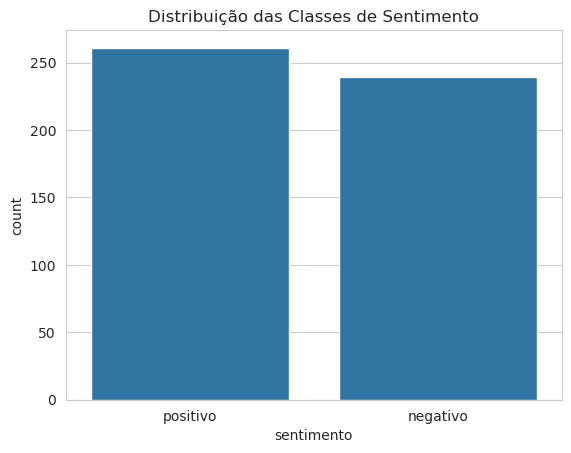

In [14]:
print("\nDistribuição dos Sentimentos:\n")
sns.countplot(x = 'sentimento', data = df_dsa)
plt.title('Distribuição das Classes de Sentimento')
plt.show()

## 5. Limpeza de Dados

Nesta etapa corrigimos os problemas identificados na EDA. Isso inclui tratar valores ausentes (por exemplo, removendo as linhas correspondentes), garantir que os dados estejam no formato correto e aplicar a função de limpeza de texto (dsa_limpa_texto) para normalizar os reviews, removendo acentos, pontuações e caracteres indesejados.

In [15]:
# Remover linhas com valores ausentes
print(f"\nTamanho original do DataFrame: {len(df_dsa)}")
df_dsa.dropna(subset = ['texto_review'], inplace = True)
print(f"Tamanho do DataFrame após remover nulos: {len(df_dsa)}")


Tamanho original do DataFrame: 500
Tamanho do DataFrame após remover nulos: 488


In [16]:
df_dsa.shape

(488, 3)

In [17]:
df_dsa.head()

,review_id,texto_review,sentimento
0,1,Estou muito feliz com a compra. O cadeira game...,positivo
2,3,Não recomendo. A entrega foi lenta e o celular...,negativo
3,4,O monitor é decepcionante. O suporte ao client...,positivo
4,5,É UM LIVRO OK PELO PRÇEO QUE PAGUEI.,negativo
5,6,Não rceomendo. A entrega atrasou muito e o mon...,positivo


In [18]:
# Função de limpeza de texto 
def dsa_limpa_texto(texto):
    
    """
    Função completa de limpeza de texto:
    1. Converte para minúsculas.
    2. Remove acentos e cedilha.
    3. Remove pontuações, números e caracteres especiais.
    4. Remove espaços extras.
    """
    
    # Garante que o texto não seja nulo (caso haja algum NaN no DataFrame)
    if not isinstance(texto, str):
        return ""

    # --- PASSO 1: Normalizar e remover acentos ---
    # Normaliza para a forma 'NFKD' que separa o caractere da acentuação
    # e depois remove os acentos (Nonspacing Mark)
    texto_sem_acentos = ''.join(c for c in unicodedata.normalize('NFKD', texto) if unicodedata.category(c) != 'Mn')

    # --- PASSO 2: Limpeza com Regex ---
    # Converter para minúsculas
    texto_limpo = texto_sem_acentos.lower()
    
    # Manter apenas letras e espaços. A remoção de acentos já foi feita.
    texto_limpo = re.sub(r'[^a-z\s]', '', texto_limpo)
    
    # Remover espaços extras
    texto_limpo = re.sub(r'\s+', ' ', texto_limpo).strip()
    
    return texto_limpo

In [19]:
# Aplica a função de limpeza
df_dsa['texto_limpo'] = df_dsa['texto_review'].apply(dsa_limpa_texto)

In [20]:
df_dsa.head()

,review_id,texto_review,sentimento,texto_limpo
0,1,Estou muito feliz com a compra. O cadeira game...,positivo,estou muito feliz com a compra o cadeira gamer...
2,3,Não recomendo. A entrega foi lenta e o celular...,negativo,nao recomendo a entrega foi lenta e o celular ...
3,4,O monitor é decepcionante. O suporte ao client...,positivo,o monitor e decepcionante o suporte ao cliente...
4,5,É UM LIVRO OK PELO PRÇEO QUE PAGUEI.,negativo,e um livro ok pelo prceo que paguei
5,6,Não rceomendo. A entrega atrasou muito e o mon...,positivo,nao rceomendo a entrega atrasou muito e o moni...


https://docs.python.org/3/library/re.html

## 6. Engenharia de Atributos

É a etapa onde transformamos dados brutos em "features" (atributos) úteis para o modelo. No nosso projeto, isso envolveu a criação da coluna texto_limpo e, mais importante, a conversão das classes de texto ('positivo', 'negativo') em um formato numérico (sentimento_label: 1, 0), que é o que o algoritmo de Machine Learning consegue entender.

In [21]:
df_dsa.head()

,review_id,texto_review,sentimento,texto_limpo
0,1,Estou muito feliz com a compra. O cadeira game...,positivo,estou muito feliz com a compra o cadeira gamer...
2,3,Não recomendo. A entrega foi lenta e o celular...,negativo,nao recomendo a entrega foi lenta e o celular ...
3,4,O monitor é decepcionante. O suporte ao client...,positivo,o monitor e decepcionante o suporte ao cliente...
4,5,É UM LIVRO OK PELO PRÇEO QUE PAGUEI.,negativo,e um livro ok pelo prceo que paguei
5,6,Não rceomendo. A entrega atrasou muito e o mon...,positivo,nao rceomendo a entrega atrasou muito e o moni...


In [22]:
# Mapear o sentimento para valores numéricos (Engenharia de Atributos)
df_dsa['sentimento_label'] = df_dsa['sentimento'].map({'positivo': 1, 'negativo': 0})

In [23]:
print("\nDataFrame após a limpeza e mapeamento:\n")
df_dsa[['texto_limpo', 'sentimento_label']].head()


DataFrame após a limpeza e mapeamento:



,texto_limpo,sentimento_label
0,estou muito feliz com a compra o cadeira gamer...,1
2,nao recomendo a entrega foi lenta e o celular ...,0
3,o monitor e decepcionante o suporte ao cliente...,1
4,e um livro ok pelo prceo que paguei,0
5,nao rceomendo a entrega atrasou muito e o moni...,1


## 7. Divisão em Dados de Treino de Teste

Um passo essencial para treinamento e avaliação do modelo. Separamos o conjunto de dados em duas partes: uma maior (treino), que o modelo usará para aprender, e uma menor (teste), que será mantida "escondida" do modelo para simular dados novos e avaliar sua real performance após o treinamento.

In [24]:
# Definir variáveis X (entrada) e y (saída)
X = df_dsa['texto_limpo']
y = df_dsa['sentimento_label']

In [25]:
# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

## 8. Pipeline de Modelagem Preditiva

Aqui, construímos uma esteira de produção automatizada para o nosso modelo. O Pipeline do Scikit-learn encapsula todas as etapas de pré-processamento (vetorização TF-IDF, padronização com StandardScaler) e o modelo final (Regressão Logística), garantindo que os mesmos passos sejam aplicados de forma consistente nos dados de treino e nos novos dados.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
# Pipeline 
pipeline = Pipeline([
    
    ('tfidf', TfidfVectorizer(stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um'])),
    
    ('scaler', StandardScaler(with_mean = False)),
    
    ('logreg', LogisticRegression(solver = 'liblinear', random_state = 42, max_iter = 1000)) 
])

In [27]:
type(pipeline)

sklearn.pipeline.Pipeline

O pipeline é composto por três etapas sequenciais, cada uma com um nome ('tfidf', 'scaler', 'logreg') e uma função específica.

### 8.1. Vetorização dos Dados de Texto ('tfidf', TfidfVectorizer(...))

O que faz? Esta é a primeira etapa, chamada 'tfidf'. Ela usa o TfidfVectorizer para converter o texto bruto em números. Ele transforma cada review em um vetor numérico, onde cada número representa a importância de uma palavra naquele texto em relação a todos os outros textos. Palavras comuns como 'de', 'a', 'o', etc., são ignoradas (stop_words).

### 8.2. Padronização de Dados ('scaler', StandardScaler(with_mean=False))

O que faz? A segunda etapa, 'scaler', pega os vetores numéricos criados pela etapa anterior e os padroniza. O StandardScaler ajusta a escala de todos os números para que tenham uma variância semelhante. O parâmetro with_mean=False é essencial aqui, pois a matriz de dados do TF-IDF é "esparsa" (cheia de zeros), e essa opção preserva essa característica, evitando problemas de memória e computação.

### 8.3. Modelo de Machine Learning ('logreg', LogisticRegression(...))

O que faz? A etapa final, 'logreg', é o modelo de classificação em si. A LogisticRegression recebe os dados numéricos, já padronizados, e aprende a fazer a previsão final: classificar o texto como "positivo" ou "negativo".


O grande benefício do pipeline é a automação e a consistência. Ao treinar este pipeline, ele aprende a fazer todas as três coisas. Depois, quando você apresenta um novo texto para ele prever, o pipeline automaticamente executa a mesma sequência exata de vetorização, padronização e classificação, garantindo que não haja erros no pré-processamento.

### 8.4. Otimização de Hiperparâmetros

É o ajuste fino do modelo. Usando GridSearchCV, testamos sistematicamente várias combinações de configurações (hiperparâmetros) para o pipeline, a fim de encontrar a combinação que resulta na melhor performance possível.

In [28]:
# Definir o grid de hiperparâmetros para otimização
parametros_grid = {
    'tfidf__max_features': [500, 1000, 2000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__max_iter': [5000, 6000]
}

In [29]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(
    pipeline,              # Pipeline com as etapas de pré-processamento e modelo
    parametros_grid,       # Dicionário com as combinações de hiperparâmetros a serem testadas
    cv = 5,                # Número de divisões para validação cruzada (5-fold cross-validation)
    n_jobs = -1,           # Usa todos os núcleos disponíveis do processador para acelerar o processo
    scoring = 'accuracy',  # Métrica usada para avaliar o desempenho de cada combinação (aqui, acurácia)
    verbose = 1            # Nível de detalhamento do output durante a execução (1 exibe progresso básico)
)

Validação cruzada é uma técnica usada para avaliar o desempenho de um modelo dividindo o conjunto de dados em várias partes (ou “folds”). O modelo é treinado em algumas dessas partes e testado em outras, de forma rotativa. Isso permite medir o desempenho de forma mais confiável e geral, evitando que o resultado dependa apenas de uma única divisão dos dados.

### 8.5. Treinamento do Modelo

Nesta etapa, alimentamos o pipeline com os dados de treino. O GridSearchCV executa o processo de .fit(), onde o algoritmo aprende os padrões que conectam o texto dos reviews aos seus respectivos sentimentos.

In [30]:
print("\nIniciando o treinamento do modelo com otimização de hiperparâmetros...\n")
grid_search.fit(X_treino, y_treino)


Iniciando o treinamento do modelo com otimização de hiperparâmetros...

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__C': [0.1, 1, ...], 'logreg__max_iter': [5000, 6000], 'logreg__penalty': ['l1', 'l2'], 'tfidf__max_features': [500, 1000, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [31]:
print("\nMelhores hiperparâmetros encontrados:\n")
print(grid_search.best_params_)


Melhores hiperparâmetros encontrados:

{'logreg__C': 0.1, 'logreg__max_iter': 5000, 'logreg__penalty': 'l1', 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 1)}


In [32]:
# Obter o melhor modelo
melhor_modelo_dsa = grid_search.best_estimator_

In [33]:
type(melhor_modelo_dsa)

sklearn.pipeline.Pipeline

## 9. Avaliação do Modelo e Interpretação de Métricas

É a "prova final". Usamos o conjunto de teste (os dados que o modelo nunca viu) para fazer previsões e compará-las com os resultados reais. Métricas como Acurácia, Relatório de Classificação e a Matriz de Confusão nos dizem quão bem o modelo está generalizando e se ele atende aos objetivos de negócio.

In [34]:
# Previsões no conjunto de teste
y_pred = melhor_modelo_dsa.predict(X_teste)

In [35]:
# Calcular as métricas de avaliação
acuracia = accuracy_score(y_teste, y_pred)
report = classification_report(y_teste, y_pred, target_names = ['Negativo', 'Positivo'])

In [36]:
print(f"\nAcurácia do Modelo: {acuracia:.2%}\n")
print("Relatório de Classificação:\n")
print(report)


Acurácia do Modelo: 81.15%

Relatório de Classificação:

              precision    recall  f1-score   support

    Negativo       0.80      0.81      0.80        58
    Positivo       0.83      0.81      0.82        64

    accuracy                           0.81       122
   macro avg       0.81      0.81      0.81       122
weighted avg       0.81      0.81      0.81       122



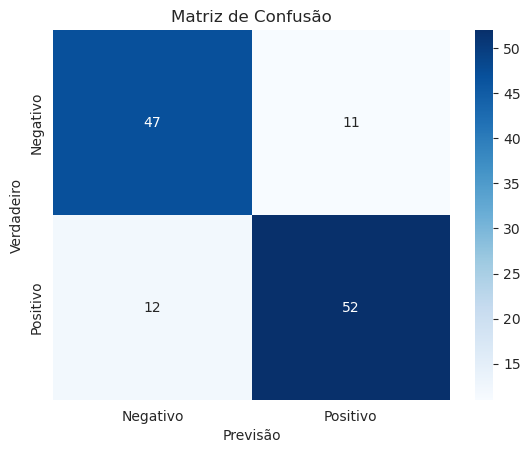

In [37]:
# Visualizar a Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Negativo', 'Positivo'],
            yticklabels = ['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

**1. Acurácia (Accuracy)**

De todos os reviews (positivos e negativos) que o modelo analisou, qual a porcentagem total de acertos?

Em nosso contexto: Se você passou 100 reviews pelo modelo e ele acertou a classificação de 92 deles (independentemente de serem positivos ou negativos), a acurácia é de 92%. É a medida mais geral de performance.

**2. Precisão (Precision)**

Esta métrica é calculada para cada classe.

Precisão para a classe 'Positivo': Dos reviews que o modelo rotulou como 'Positivos', quantos eram realmente Positivos?

Em nosso contexto: Se o modelo marcou 10 reviews como "Positivos", mas apenas 9 deles eram de fato positivos (e 1 era um erro, um falso positivo), a precisão para a classe 'Positivo' é de 90%.

Importância: Uma alta precisão aqui significa que você pode confiar na etiqueta "Positivo". Se você for usar esses reviews em um material de marketing, por exemplo, não quer mostrar acidentalmente um review negativo.

Precisão para a classe 'Negativo': Dos reviews que o modelo rotulou como 'Negativos', quantos eram realmente Negativos?

Em nosso contexto: Se o modelo marcou 10 reviews como "Negativos" e todos os 10 eram de fato negativos, a precisão para a classe 'Negativo' é de 100%.

Importância: Essencial para a equipe de suporte. Uma alta precisão aqui garante que o tempo da equipe não seja gasto analisando reviews que na verdade eram positivos (falsos negativos para o time de suporte).

**3. Recall**

Esta métrica também é calculada para cada classe.

Recall para a classe 'Positivo': De todos os reviews que realmente eram Positivos, quantos o seu modelo conseguiu encontrar?

Em nosso contexto: Se existiam 12 reviews positivos no total, mas o seu modelo só conseguiu identificar 9 deles (deixando 3 passarem despercebidos), o recall para a classe 'Positivo' é de 75% (9 de 12).

Importância: Um alto recall aqui garante que você está capturando a maior parte do feedback positivo. Você não está perdendo a oportunidade de identificar clientes satisfeitos.

Recall para a classe 'Negativo': De todos os reviews que realmente eram Negativos, quantos o seu modelo conseguiu encontrar?

Em nosso contexto: Se existiam 10 clientes insatisfeitos (reviews negativos), e o modelo identificou 9 deles, o recall para 'Negativo' é de 90%. Ele "deixou escapar" um cliente insatisfeito.

Importância: Talvez a métrica mais crítica para a gestão de crises. Um alto recall para 'Negativo' é vital para garantir que quase nenhuma reclamação passe despercebida e que a equipe de suporte possa agir.

**4. F1-Score**

Qual é o balanço equilibrado entre a Precisão e o Recall para cada classe?

Em nosso contexto: É uma única nota que combina as duas métricas anteriores. O F1-Score para a classe 'Positivo' só será alto se tanto a precisão quanto o recall para 'Positivo' forem altos. Ele evita o cenário onde um modelo é ótimo em uma métrica, mas péssimo em outra. É frequentemente a melhor métrica para avaliar a performance do modelo em uma classe específica.

**5. Support (Suporte)**

Quantos reviews de cada classe realmente existiam no meu conjunto de teste?

Em nosso contexto: Se o relatório mostra um support de 58 para 'Positivo' e 62 para 'Negativo', significa que no seu conjunto de dados de teste havia 58 reviews positivos e 62 negativos.

Importância: Dá contexto aos resultados. Se o support de uma classe for muito baixo, as métricas de performance para essa classe são menos confiáveis, pois foram calculadas com base em poucos exemplos.

In [38]:
# Se estivermos satisfeitos com a performance do modelo, salvamos em disco
joblib.dump(melhor_modelo_dsa, 'modelo_sentimento_dsa_v1.joblib')

['modelo_sentimento_dsa_v1.joblib']

In [39]:
# Pode deletar o modelo treinado e removê-lo da memória
del melhor_modelo_dsa

**Nota: Normalmente aqui termina o trabalho de um Cientista de Dados. A etapa a seguir é, normalmente, responsabilidade de um Engenheiro de Machine Learning.**

## 10. MLOps, Deploy e Uso do Modelo

A etapa final, onde o modelo começa a gerar valor real. "Deploy" significa colocar o modelo treinado em produção. No nosso caso, simulamos isso criando a função dsa_prever_sentimento, que encapsula o pipeline treinado e pode ser usada para classificar novos reviews de forma rápida e automática.

Leia sobre MLOps no Capítulo 11 do curso.

In [40]:
# Carregar o modelo a partir do disco
modelo_dsa_deploy = joblib.load('modelo_sentimento_dsa_v1.joblib')

In [41]:
type(modelo_dsa_deploy)

sklearn.pipeline.Pipeline

In [42]:
# Criar novos dados para simular o uso em produção
novos_reviews = [
    "A bateria do celular não dura nada, péssima compra.",
    "Chegou antes do prazo e o produto é de ótima qualidade! Estou muito feliz.",
    "O serviço de atendimento foi rápido e eficiente.",
    "Não recomendo, veio faltando peças e a cor estava errada."
]

In [43]:
# Função para prever o sentimento de novos reviews 
def dsa_prever_sentimento(reviews):
    
    """
    Recebe uma lista de textos de review e retorna a previsão de sentimento.
    O objeto 'melhor_modelo_dsa' (pipeline) cuida de todos os passos internos.
    """
    
    # 1. 'reviews' entra no pipeline
    # 2. TF-IDF é aplicado internamente
    # 3. StandardScaler é aplicado internamente
    # 4. LogisticRegression faz a previsão
    previsoes = modelo_dsa_deploy.predict(reviews)
    
    # Mapeia o resultado numérico de volta para texto
    sentimentos = ['Negativo' if p == 0 else 'Positivo' for p in previsoes]
    
    # Exibe os resultados
    for review, sentimento in zip(reviews, sentimentos):
        print(f"\nReview: '{review}'\nSentimento Previsto: {sentimento}\n---")

In [44]:
# Executar a função de deploy com os novos dados
print("\n--- Iniciando Classificação de Novos Reviews (Deploy com Pipeline Completo) ---\n")
dsa_prever_sentimento(novos_reviews)


--- Iniciando Classificação de Novos Reviews (Deploy com Pipeline Completo) ---


Review: 'A bateria do celular não dura nada, péssima compra.'
Sentimento Previsto: Negativo
---

Review: 'Chegou antes do prazo e o produto é de ótima qualidade! Estou muito feliz.'
Sentimento Previsto: Positivo
---

Review: 'O serviço de atendimento foi rápido e eficiente.'
Sentimento Previsto: Negativo
---

Review: 'Não recomendo, veio faltando peças e a cor estava errada.'
Sentimento Previsto: Negativo
---


**Projeto concluído, projeto entregue, cliente feliz, partimos para o próximo projeto! :-)**

# Fim